In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

In [2]:
# taking csv prepared earlier to explore data 

filepath = "score.csv"
# Read the data into a pandas dataframe called emails

df = pd.read_csv(filepath)

headers = [header for header in df.columns]

print("Successfully loaded {} rows and {} columns!".format(df.shape[0], df.shape[1]))

Successfully loaded 312645 rows and 23 columns!


In [3]:
df.head(3)

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,topemotion
0,Here is our forecast,phillip.allen@enron.com,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,tim.belden@enron.com,NaN,Allen-P,2001,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,fear
1,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,phillip.allen@enron.com,allen-p,2001-05-04 20:51:00+00:00,Re:,'sent mail,john.lavorato@enron.com,NaN,Allen-P,2001,...,0.094070,0.096115,0.106339,0.089980,0.114519,0.104294,0.100204,0.096115,0.100204,positive
2,test successful. way to go!!!,phillip.allen@enron.com,allen-p,2000-10-18 10:00:00+00:00,Re: test,'sent mail,leah.arsdall@enron.com,NaN,Allen-P,2000,...,0.083333,0.111111,0.111111,0.083333,0.111111,0.111111,0.111111,0.083333,0.111111,anticip


#  NRCLex lib for emotion score

In [4]:
from nrclex import NRCLex
# https://pypi.org/project/NRCLex/
'''
NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, 
and is based on the National Research Council Canada (NRC)affect lexicon (see link below) 
and the NLTK library's WordNet synonym sets.
'''

"\nNRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, \nand is based on the National Research Council Canada (NRC)affect lexicon (see link below) \nand the NLTK library's WordNet synonym sets.\n"

In [5]:
def emotion(x):
    text_object = NRCLex(x)
    fear = text_object.affect_frequencies['fear']
    anger = text_object.affect_frequencies['anger']
    anticip = text_object.affect_frequencies['anticip']
    trust = text_object.affect_frequencies['trust']
    surprise = text_object.affect_frequencies['surprise']
    positive = text_object.affect_frequencies['positive']
    negative = text_object.affect_frequencies['negative']
    sadness = text_object.affect_frequencies['sadness']
    disgust = text_object.affect_frequencies['disgust']
    joy = text_object.affect_frequencies['joy']
    topemotion = text_object.top_emotions[0][0]
    return pd.Series([fear, anger, anticip, trust, surprise, positive, negative, sadness, disgust, joy, topemotion], index=['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'topemotion'])

In [6]:
# calling function to get emotion score

#df[['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy', 'topemotion']] = df['email-body'].swifter.apply(lambda x : emotion(x))

'''
already ran function to add score so no need to run again
'''

'\nalready ran in so no need to run again\n'

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# Function to add time_hour of mail in features

def hr_func(ts):
    return ts.hour


# calling the function
df['time_hour'] = df['Date'].apply(hr_func)

In [22]:
### Function for creating class according to hour of a day
### for employee sending or receiving mails reflecting the stress level for work 

def label (row):
    if 9 <= row <= 17: # working hours of a normal office day-- stress level --- "Low"
        return 'Work'
    elif 17 < row <= 21: # working little late to complete work for the day --stress level--- "Medium"
        return 'Evening'
    elif (21 < row) & (row <= 24): # working really late or whole night --- stress level --- "High"
        return 'Night'
    return 'Night'


In [23]:
## adding the "working-hour" feature by calling the function

df['Work'] = df['time_hour'].apply (lambda row: label(row))


In [24]:
## having a look at new features

df[['topemotion', 'time_hour', 'Work']].head()

,topemotion,time_hour,Work
0,fear,23,Night
1,positive,20,Evening
2,anticip,10,Work
3,trust,13,Work
4,fear,12,Work


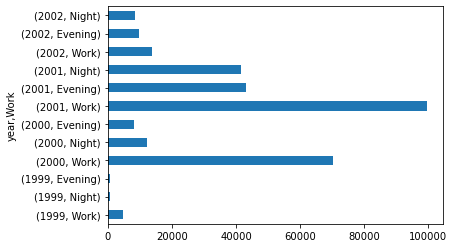

In [25]:
##  Ploting stress level over the years 

df.groupby("year")["Work"].value_counts().plot.barh()

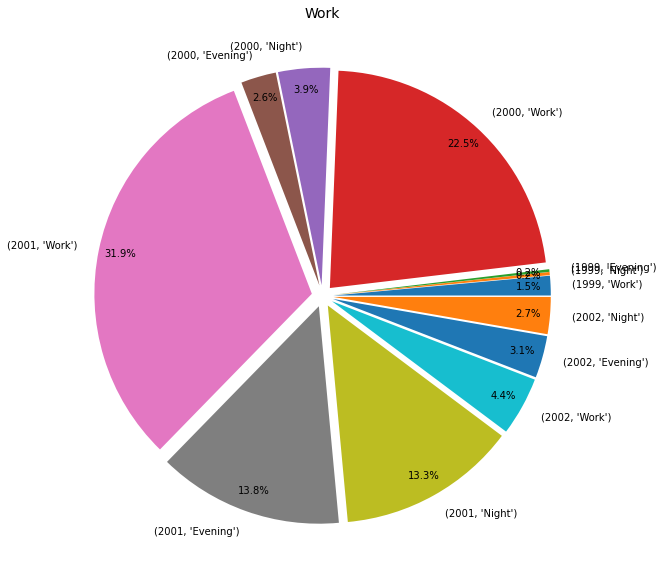

In [26]:
## Plotting the same in Pie chart

data = df.groupby("year")["Work"].value_counts()

pie, ax = plt.subplots(figsize=[16,10])

labels = data.keys()

plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*12, labels=labels, pctdistance=0.9)

plt.title("Work", fontsize=14);

In [17]:
### Function for plotting the wordcloud on the basis of sentiment analysis 

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import wordcloud


def WC(Folder, stpwords = None):
    
    data = df.loc[df['X-Folder'] == Folder]
     
    
    stop_words = stopwords.words('english')
    
    list_stpwords = ['enron', 'com', 're', 'RECIPIENTS', 'CN', 'ENRON', 'OU', 'NA', 'Thank', 'mail', 'know', 'get', 'Thanks', 'one', 'let', 'cc', 'bc', 'subject', 'http', 'www', 'hotmail', 'email', 'would', 'back', 'time', 'bcc','new', 'aol', 'Com', 'Original Message','message']
    
    if stpwords is True:
        
         list_stpwords.append(stpwords) 
        
        
    stop_words.extend(list_stpwords)

    subjects = ' '.join(data['email-body'])

    fig, ax = plt.subplots(figsize=(16, 12))

    wc = wordcloud.WordCloud(width=800, 
                             height=600, 
                             max_words=200,
                             stopwords=stop_words).generate(subjects)
    ax.imshow(wc)
    ax.axis("off")
    
    plot = ax.imshow(wc)
    
    return plot

/home/becode/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


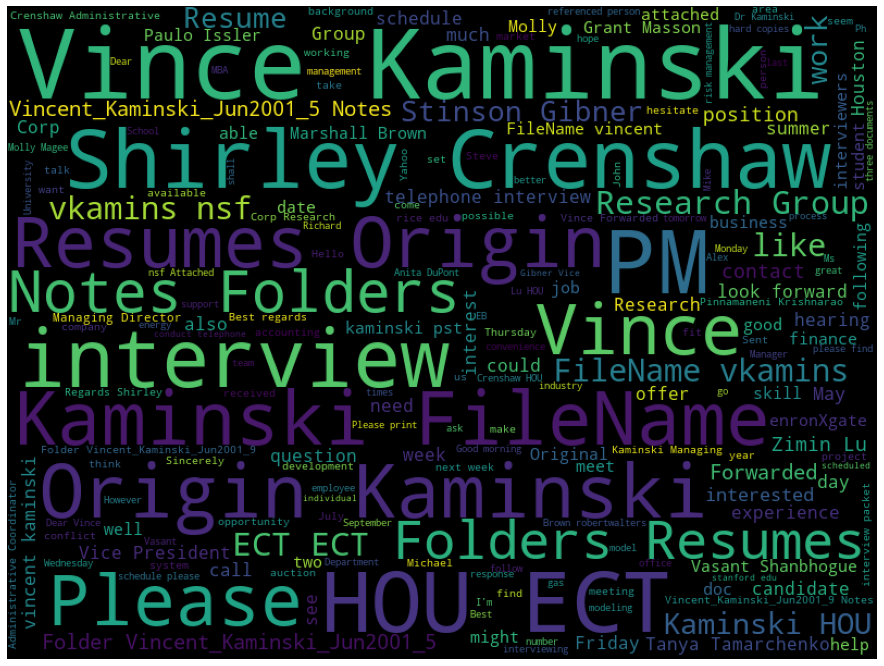

In [18]:
## Calling the function to check how it works

WC('resumes')

In [28]:
df = df.drop(columns = ['Stress_level'])

In [29]:
df.head()

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work
0,Here is our forecast,phillip.allen@enron.com,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,tim.belden@enron.com,NaN,Allen-P,2001,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,fear,23,Night
1,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,phillip.allen@enron.com,allen-p,2001-05-04 20:51:00+00:00,Re:,'sent mail,john.lavorato@enron.com,NaN,Allen-P,2001,...,0.106339,0.089980,0.114519,0.104294,0.100204,0.096115,0.100204,positive,20,Evening
2,test successful. way to go!!!,phillip.allen@enron.com,allen-p,2000-10-18 10:00:00+00:00,Re: test,'sent mail,leah.arsdall@enron.com,NaN,Allen-P,2000,...,0.111111,0.083333,0.111111,0.111111,0.111111,0.083333,0.111111,anticip,10,Work
3,"Randy, Can you send me a schedule of the salary and level of everyone in the scheduling group....",phillip.allen@enron.com,allen-p,2000-10-23 13:13:00+00:00,NaN,'sent mail,randall.gay@enron.com,NaN,Allen-P,2000,...,0.142857,0.095238,0.095238,0.095238,0.095238,0.095238,0.095238,trust,13,Work
4,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,allen-p,2000-08-31 12:07:00+00:00,Re: Hello,'sent mail,greg.piper@enron.com,NaN,Allen-P,2000,...,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,fear,12,Work


In [20]:
data = df.groupby("year")["Stress_level"].value_counts(normalize  = True)

In [21]:
data

year  Stress_level
1999  Low             0.774051
      High            0.122765
      Medium          0.103184
2000  Low             0.776470
      High            0.133047
      Medium          0.090483
2001  Low             0.540557
      Medium          0.233727
      High            0.225716
2002  Low             0.426329
      Medium          0.305316
      High            0.268355
Name: Stress_level, dtype: float64